# Exploratory Data Analysis

## Initial Setup

Add parent directory (`server`) to system path, to be able to import modules from `src`

In [1]:
import sys
sys.path.append("..")

Import required libraries

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle

import kaggle
import umap

from src_backend.util import DATA_DIR, DATA_FILENAME, DATASET_NAME

Download Iris dataset from Kaggle, and load it in as Pandas DataFrame

In [3]:
kaggle.api.authenticate()
kaggle.api.dataset_download_file(DATASET_NAME, DATA_FILENAME, DATA_DIR, force=True)
df = pd.read_csv(DATA_DIR / DATA_FILENAME)

## Data Exploration

Looking at the first 5 lines of dataset

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Checking data types of columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Checking summary statistics of columns (helps to pick out abnormal values)

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Input features

In [8]:
df.drop(columns=["Id", "Species"]).head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Plot UMap of iris dataset

Text(0, 0.5, 'y')

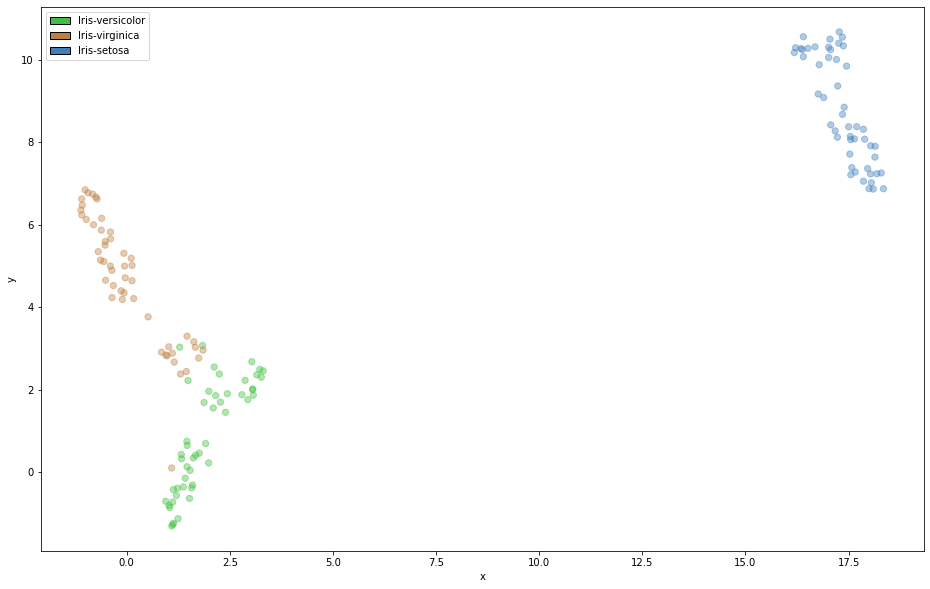

In [10]:
# Compute UMAP embeddings of features
umap_embedder = umap.UMAP()
umap_embeddings = umap_embedder.fit_transform(df.drop(columns=["Id", "Species"]))

# Plot UMAP
plt.figure(figsize=(16, 10))
color_map = {
    "Iris-versicolor": "#3FBF3F",
    "Iris-virginica": "#BF7F3F",
    "Iris-setosa": "#3F7FBF"
}
plt.scatter(
    umap_embeddings[:, 0],
    umap_embeddings[:, 1],
    c=[color_map[y] for y in df["Species"]],
    s=40,
    alpha=0.4
)

handles = [
    Rectangle((0, 0), 1, 1, color=c, ec="k") for c in color_map.values()
]

labels = list(color_map.keys())
plt.legend(handles, labels)

plt.gca().set_aspect("equal", "box")
plt.gca().set_xlabel("x")
plt.gca().set_ylabel("y")